In [128]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [129]:
df_IN = df[df['job_country'] == 'India'].copy()
df_IN

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"[powershell, python, sql, mysql, sql server, d...","{'cloud': ['databricks', 'azure'], 'databases'..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"[python, sql, aws, pyspark, docker, jira]","{'async': ['jira'], 'cloud': ['aws'], 'librari..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"[excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']}"
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"[c#, sql]","{'programming': ['c#', 'sql']}"
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None


In [130]:
df_IN['job_posted_month'] = df_IN['job_posted_date'].dt.strftime('%b')
df_IN

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"[powershell, python, sql, mysql, sql server, d...","{'cloud': ['databricks', 'azure'], 'databases'...",Jun
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['...",Apr
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None,Mar
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'...",Jul
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"[python, sql, aws, pyspark, docker, jira]","{'async': ['jira'], 'cloud': ['aws'], 'librari...",Nov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"[excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']}",Mar
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None,Mar
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"[c#, sql]","{'programming': ['c#', 'sql']}",Mar
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None,Mar


In [131]:
df_IN_exploded = df_IN.explode('job_skills').copy()
df_IN_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,powershell,"{'cloud': ['databricks', 'azure'], 'databases'...",Jun
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,python,"{'cloud': ['databricks', 'azure'], 'databases'...",Jun
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,sql,"{'cloud': ['databricks', 'azure'], 'databases'...",Jun
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,mysql,"{'cloud': ['databricks', 'azure'], 'databases'...",Jun
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,sql server,"{'cloud': ['databricks', 'azure'], 'databases'...",Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,c#,"{'programming': ['c#', 'sql']}",Mar
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,sql,"{'programming': ['c#', 'sql']}",Mar
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None,Mar
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}",Mar


In [132]:
# Pivot so that job_skills are columns and job_posted_month is the index
pivot_table = df_IN_exploded.pivot_table(index='job_posted_month', columns='job_skills', values='job_posted_date', aggfunc='size', fill_value=0)
# Add a 'Total' column for each month (row sum)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom,Total
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Apr,380,0,88,27,0,32,0,5,1,6,...,55,4,101,2,0,0,2,26,9,23542
Aug,397,0,120,26,2,36,4,0,0,7,...,37,2,111,0,0,0,1,24,8,24288
Dec,346,0,57,14,0,36,0,3,0,5,...,57,2,72,0,0,0,0,31,10,23180
Feb,358,0,76,32,0,44,0,6,1,4,...,47,1,77,1,0,0,4,25,8,23102
Jan,444,4,124,51,0,48,0,2,1,22,...,73,2,128,0,0,0,0,47,14,32045
Jul,402,0,91,27,1,31,4,1,2,3,...,46,2,96,0,0,0,0,29,12,23850
Jun,402,0,82,24,2,28,3,2,4,10,...,63,4,70,2,0,2,0,25,13,25334
Mar,381,0,77,25,3,39,0,0,2,7,...,52,1,86,1,0,0,0,35,8,24015
May,351,0,70,24,0,26,0,1,1,5,...,30,1,67,0,0,1,0,20,10,19480


In [133]:
# Sort by 'Total' so months with the most postings are at the top
pivot_table.sort_values(by='Total', ascending=False, inplace=True)
pivot_table

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom,Total
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,444,4,124,51,0,48,0,2,1,22,...,73,2,128,0,0,0,0,47,14,32045
Nov,471,0,93,20,0,33,1,1,3,4,...,58,0,110,0,1,0,1,25,6,29306
Jun,402,0,82,24,2,28,3,2,4,10,...,63,4,70,2,0,2,0,25,13,25334
Aug,397,0,120,26,2,36,4,0,0,7,...,37,2,111,0,0,0,1,24,8,24288
Mar,381,0,77,25,3,39,0,0,2,7,...,52,1,86,1,0,0,0,35,8,24015
Jul,402,0,91,27,1,31,4,1,2,3,...,46,2,96,0,0,0,0,29,12,23850
Apr,380,0,88,27,0,32,0,5,1,6,...,55,4,101,2,0,0,2,26,9,23542
Dec,346,0,57,14,0,36,0,3,0,5,...,57,2,72,0,0,0,0,31,10,23180
Feb,358,0,76,32,0,44,0,6,1,4,...,47,1,77,1,0,0,4,25,8,23102


In [134]:
# Reorder index to have months from Jan to Dec
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Total']
ordered_months = [m for m in month_order if m in pivot_table.index]
pivot_table = pivot_table.loc[ordered_months]
#pivot_table.drop(columns='Total', inplace=True)

In [135]:
# Calculate percentage of each skill count in each month out of the total for that month
percentage_table = pivot_table.copy()
for month in percentage_table.index:
    total = percentage_table.loc[month, 'Total']
    for skill in percentage_table.columns:
        percentage = (percentage_table.loc[month, skill] / total) * 100 if total != 0 else 0
        percentage_table.loc[month, skill] = round(percentage, 1)
# Optionally, drop the 'Total' column if you only want the skill percentages
percentage_table = percentage_table.drop(columns=['Total'])
percentage_table

C:\Users\Harikrish Somu\AppData\Local\Temp\ipykernel_12488\51120776.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  percentage_table.loc[month, skill] = round(percentage, 1)
C:\Users\Harikrish Somu\AppData\Local\Temp\ipykernel_12488\51120776.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  percentage_table.loc[month, skill] = round(percentage, 1)
C:\Users\Harikrish Somu\AppData\Local\Temp\ipykernel_12488\51120776.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype fi

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,1.4,0,0.4,0.2,0,0.1,0,0,0,0.1,...,0,0.2,0,0.4,0,0,0,0,0.1,0.0
Feb,1.5,0,0.3,0.1,0,0.2,0,0,0,0.0,...,0,0.2,0,0.3,0,0,0,0,0.1,0.0
Mar,1.6,0,0.3,0.1,0,0.2,0,0,0,0.0,...,0,0.2,0,0.4,0,0,0,0,0.1,0.0
Apr,1.6,0,0.4,0.1,0,0.1,0,0,0,0.0,...,0,0.2,0,0.4,0,0,0,0,0.1,0.0
May,1.8,0,0.4,0.1,0,0.1,0,0,0,0.0,...,0,0.2,0,0.3,0,0,0,0,0.1,0.1
Jun,1.6,0,0.3,0.1,0,0.1,0,0,0,0.0,...,0,0.2,0,0.3,0,0,0,0,0.1,0.1
Jul,1.7,0,0.4,0.1,0,0.1,0,0,0,0.0,...,0,0.2,0,0.4,0,0,0,0,0.1,0.1
Aug,1.6,0,0.5,0.1,0,0.1,0,0,0,0.0,...,0,0.2,0,0.5,0,0,0,0,0.1,0.0
Sep,1.5,0,0.3,0.1,0,0.1,0,0,0,0.0,...,0,0.1,0,0.4,0,0,0,0,0.1,0.0


In [136]:
# Shuffle columns so that the skill with the most overall skill count across 12 months comes first
# Calculate total for each skill (column) across all months
skill_totals = percentage_table.sum(axis=0)
# Exclude 'Total' if present
if 'Total' in skill_totals.index:
    skill_totals = skill_totals.drop('Total')
# Sort skills by total in descending order
sorted_skills = skill_totals.sort_values(ascending=False).index.tolist()
# Reorder columns
percentage_table = percentage_table[sorted_skills]
percentage_table

job_skills,python,sql,aws,spark,azure,tableau,hadoop,r,java,scala,...,vue,visual basic,webex,watson,vue.js,wire,wrike,workfront,xamarin,wsl
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,10.0,10.1,4.4,4.5,4.2,2.7,2.8,2.6,2.7,2.1,...,0,0,0,0,0,0,0,0,0,0
Feb,9.7,9.8,4.4,4.7,4.0,2.7,3.1,2.4,2.8,2.1,...,0,0,0,0,0,0,0,0,0,0
Mar,10.0,10.0,4.5,4.6,4.0,2.7,2.6,2.5,2.7,2.1,...,0,0,0,0,0,0,0,0,0,0
Apr,9.7,10.1,4.6,4.6,4.0,2.8,2.7,2.4,2.8,2.0,...,0,0,0,0,0,0,0,0,0,0
May,10.1,10.0,4.9,4.7,4.2,2.7,2.7,2.3,2.6,2.2,...,0,0,0,0,0,0,0,0,0,0
Jun,10.3,9.9,4.7,4.8,4.2,2.6,2.6,2.7,2.7,2.2,...,0,0,0,0,0,0,0,0,0,0
Jul,10.2,10.3,4.7,4.4,4.4,2.7,2.7,2.7,2.4,2.2,...,0,0,0,0,0,0,0,0,0,0
Aug,9.9,10.0,4.7,4.5,4.0,3.0,2.6,3.0,2.5,1.9,...,0,0,0,0,0,0,0,0,0,0
Sep,10.5,10.5,4.7,4.1,4.4,3.0,2.6,2.7,2.5,2.3,...,0,0,0,0,0,0,0,0,0,0


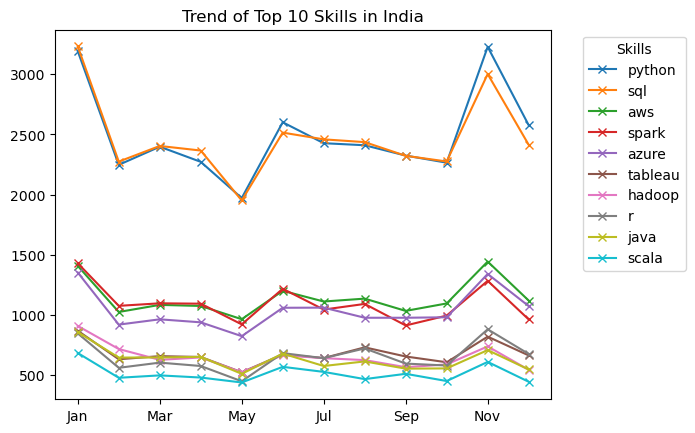

In [137]:
sorted = skill_totals.sort_values(ascending=False).index.tolist()
pivot_table = pivot_table[sorted]

pivot_table.iloc[:, :10].plot(kind='line', marker='x')
plt.title('Trend of Top 10 Skills in India')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Skills', bbox_to_anchor=(1.05, 1), loc='upper left')

In [138]:
top_10 = percentage_table.iloc[:, :10]
top_10

job_skills,python,sql,aws,spark,azure,tableau,hadoop,r,java,scala
job_posted_month,,,,,,,,,,
Jan,10.0,10.1,4.4,4.5,4.2,2.7,2.8,2.6,2.7,2.1
Feb,9.7,9.8,4.4,4.7,4.0,2.7,3.1,2.4,2.8,2.1
Mar,10.0,10.0,4.5,4.6,4.0,2.7,2.6,2.5,2.7,2.1
Apr,9.7,10.1,4.6,4.6,4.0,2.8,2.7,2.4,2.8,2.0
May,10.1,10.0,4.9,4.7,4.2,2.7,2.7,2.3,2.6,2.2
Jun,10.3,9.9,4.7,4.8,4.2,2.6,2.6,2.7,2.7,2.2
Jul,10.2,10.3,4.7,4.4,4.4,2.7,2.7,2.7,2.4,2.2
Aug,9.9,10.0,4.7,4.5,4.0,3.0,2.6,3.0,2.5,1.9
Sep,10.5,10.5,4.7,4.1,4.4,3.0,2.6,2.7,2.5,2.3


(1.0, 12.0)

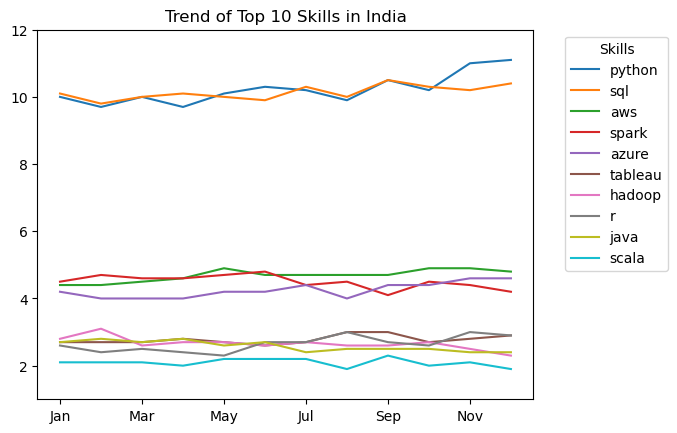

In [139]:
top_10.plot(kind='line')
plt.legend(title='Skills', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Trend of Top 10 Skills in India')
plt.xlabel('')
plt.ylabel('') 
plt.ylim(1, 12)        # Set y-axis range from 0 to 50